
GRIP : The Sparks Foundation
Data Science and Business Analyst 
Author : Pavan Raval
Task 1 : Prediction Using Supervised Machine Learning

/* In this task we have to predict the percentage of an student based on the no. of study hours. In the given task we have to use 2 variables where the 1st feature is no of hours studied and the target value is the percentage score. This given task can be solved using Simple Linear regression */

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from remote Url

In [4]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

DATA EXPLORATION

In [5]:
print("Data imported successfully")

s_data.head(19)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


VISUALISATION OF DATA

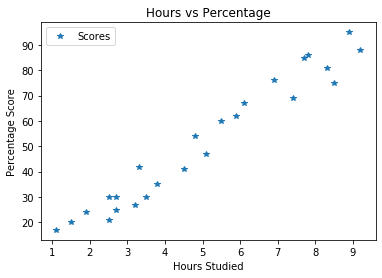

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


There is a positive linear relation between the scores and the number of hours studied.

DATA PREPARATION

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  


We first split the data into training data set and testing data set and then train the algorithm.


In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)  
                            

MODEL TRAINING

In [14]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


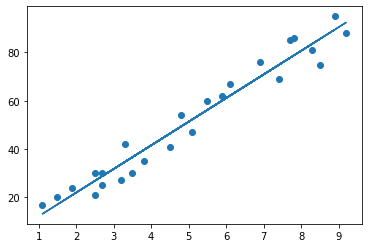

In [21]:

line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

PREDICTING PART
Now that we have trained our model, prediction can be done.

In [20]:
print(X_test)
y_pred = model.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


EVALUATING THE MODEL
Now that the training of the data is complete, evaluation of model performance on unseen OR test data is to be done.

EVALUATING THE MODEL
Now that the training of the data is complete, evaluation of model performance on unseen OR test data is to be done.

In [22]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
Mean Absolute Error: 4.419727808027652


PREDICTED SCORE IF A STUDENT STUDIES FOR 9.37 HOURS PER DAY

In [25]:
hours = np.array([[9.37]])
prediction = model.predict(hours)
print('No of hours ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours =[[9.37]]
Predicted score=94.08968523718045


PREDICTED SCORE IF A STUDENT DOES NOT STUDIES FOR 9.37 HOURS PER DAY

In [26]:
hours = np.array([[8.12]])
prediction = model.predict(hours)
print('No of hours ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours =[[8.12]]
Predicted score=81.85397687874413


From the above result it is clear that if a student does not studies for 9.37 hours then the predicted score will be 81.85397687874413 and there is a significant drop off in the predicted value.